In [ ]:
import pandas as pd
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

In [ ]:
df_ltc = pd.read_csv('cleaned_tweets_btc.csv')

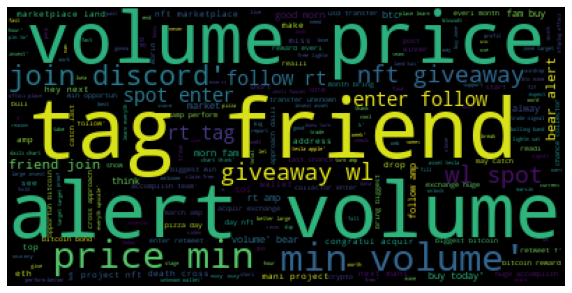

In [ ]:
df3 = pd.read_csv('cleaned_tweets_btc.csv')

text = df3['TweetText'].values 

wordcloud = WordCloud().generate(str(text))
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from textblob import TextBlob

In [ ]:
df_ltc['Polarity']= ""

In [ ]:
x=TextBlob(str('good')).polarity
x

0.7

In [ ]:
x=TextBlob(str('bad')).polarity
x

-0.6999999999999998

In [ ]:
for i in df_ltc.index:
  x = (TextBlob(str(df_ltc['TweetText'][i])).polarity)
  df_ltc['Polarity'][i]=x


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_ltc['Category']= ""

In [ ]:
for ind in df_ltc.index:
  if df_ltc['Polarity'][ind]  < 0:
    df_ltc['Category'][ind] = "Negative"
  elif df_ltc['Polarity'][ind]  == 0:
    df_ltc['Category'][ind] = "Neutral"
  elif df_ltc['Polarity'][ind]  > 0:
    df_ltc['Category'][ind]= "Positive"

df_ltc.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,TweetText,Polarity,Category
0,0,world prefer bet site learn regi,0.0,Neutral
1,1,follow scalpartist get dump min ftm,0.0,Neutral
2,2,stage may end earli due intense interest thank...,0.0375,Positive
3,3,congratul acquir exchange huge accomplish team,0.4,Positive
4,4,super step airdrop nft sgmt regist claim,0.333333,Positive


In [ ]:
df_ltc.to_csv('polarity_btc.csv')

In [ ]:
df2=pd.read_csv('polarity_btc.csv')

In [ ]:
#category = df2["Category"]
pos=0
neg=0
neut=0

for i in range (0,len(df2)):
    get_val=df2.Polarity[i]
    if(float(get_val)<(0)):
        neg=neg+1
    if(float(get_val>(0))):
        pos=pos+1
    if(float(get_val==(0))):
        neut=neut+1
    
pos_per=(pos/(len(df2)))*100
neg_per=(neg/(len(df2)))*100
neut_per=(neut/(len(df2)))*100


print("POSITIVE TWEETS % = ",pos_per)
print("NEGATIVE TWEETS % = ",neg_per)
print("NEUTRAL TWEETS  % = ",neut_per)


arr=np.asarray([pos_per,neg_per,neut_per], dtype=int)

"""
plt.pie(arr,labels=['Positive','Negative','Neutral'],colors=['blue','red','green'])
plt.plot()
"""

POSITIVE TWEETS % =  34.82587064676617
NEGATIVE TWEETS % =  7.213930348258707
NEUTRAL TWEETS  % =  57.960199004975124


"\nplt.pie(arr,labels=['Positive','Negative','Neutral'],colors=['blue','red','green'])\nplt.plot()\n"

In [ ]:
labels=['Positive','Negative','Neutral']
fig = px.pie(values=arr, names=labels,color_discrete_sequence=['blue','green','red'],title='Sentiment Analysis Results')
fig.show()